In [1]:
import pandas as pd

# Sample data
value = "C305684736"

# Create a DataFrame with a single column
df = pd.DataFrame({'Category': [value]})

# Use get_dummies for one-hot encoding
encoded_df = pd.get_dummies(df, columns=['Category'])

print("Original Value:", value)
print("One-Hot Encoded Value:\n", encoded_df)


Original Value: C305684736
One-Hot Encoded Value:
    Category_C305684736
0                 True


In [2]:
from sklearn.preprocessing import LabelEncoder

# Sample data
value = "C305684736"

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the data
numerical_value = label_encoder.fit_transform([value])

print("Original Value:", value)
print("Numerical Value:", numerical_value[0])


Original Value: C305684736
Numerical Value: 0


In [3]:
import hashlib

# Sample data
unique_id = "C305684736"

# Apply a hash function
numerical_value = int(hashlib.sha256(unique_id.encode()).hexdigest(), 16)

print("Original Unique ID:", unique_id)
print("Numerical Value:", numerical_value)


Original Unique ID: C305684736
Numerical Value: 75364994593501286919639609513934937310824175380541589009365194231652380753452


In [ ]:
import pandas as pd
import hashlib

# Sample DataFrame
d = data[]
df = pd.DataFrame(data)

# Apply hash function to convert 'nameOrig' to numerical values
df['numerical_value'] = df['nameOrig'].apply(lambda x: int(hashlib.sha256(x.encode()).hexdigest(), 16))

# Display the DataFrame with the numerical values
print(df)


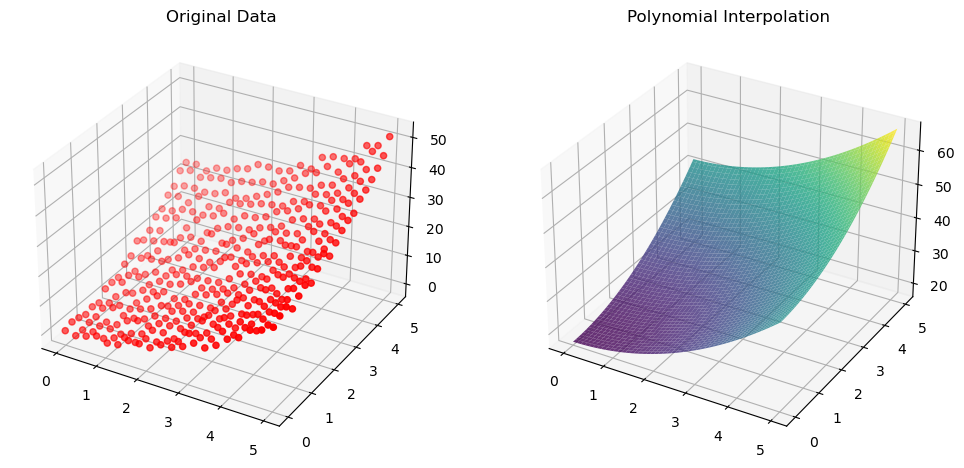

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
np.random.seed(42)
x = np.linspace(0, 5, 20)
y = np.linspace(0, 5, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + np.random.normal(0, 1, X.shape)

# Flatten the data for polynomial fitting
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()

# Polynomial fit
degree = 2  # Adjust the degree of the polynomial as needed
coefficients_x = np.polyfit(x_flat, z_flat, degree)
coefficients_y = np.polyfit(y_flat, z_flat, degree)

# Create a grid for the interpolated surface
x_interpolated = np.linspace(0, 5, 100)
y_interpolated = np.linspace(0, 5, 100)
X_interpolated, Y_interpolated = np.meshgrid(x_interpolated, y_interpolated)

# Evaluate the polynomial at the grid points
Z_interpolated_x = np.polyval(coefficients_x, X_interpolated.flatten())
Z_interpolated_y = np.polyval(coefficients_y, Y_interpolated.flatten())

# Reshape Z_interpolated to match X_interpolated and Y_interpolated
Z_interpolated = (Z_interpolated_x.reshape(X_interpolated.shape) +
                  Z_interpolated_y.reshape(Y_interpolated.shape))

# Plot the original data and the interpolated surface
fig = plt.figure(figsize=(12, 6))

# Original Data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X, Y, Z, c='r', marker='o', label='Original Data')
ax1.set_title('Original Data')

# Interpolated Surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_interpolated, Y_interpolated, Z_interpolated, cmap='viridis', alpha=0.8)
ax2.set_title('Polynomial Interpolation')

plt.show()


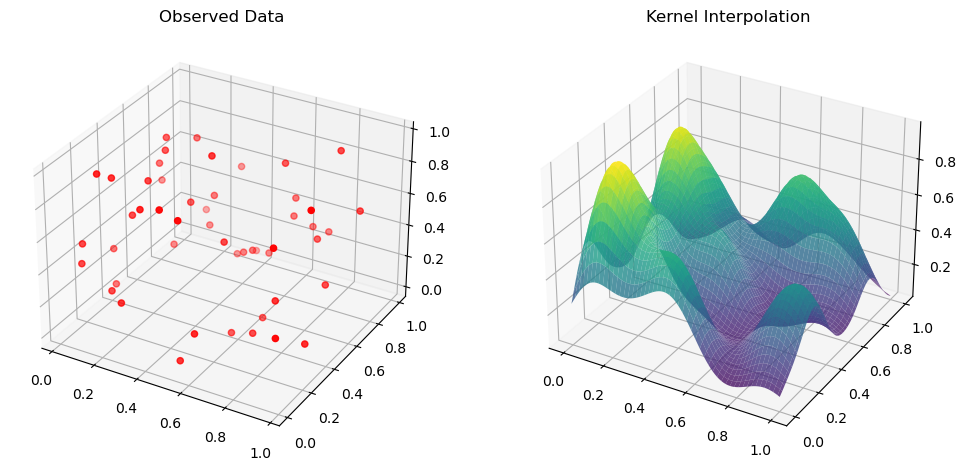

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate sample data
np.random.seed(42)
x_observed = np.random.rand(50)
y_observed = np.random.rand(50)
z_observed = np.random.rand(50)

# Define kernel function (Gaussian kernel)
def kernel_function(x, y, sigma=0.1):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

# Interpolation grid
x_interpolation = np.linspace(0, 1, 100)
y_interpolation = np.linspace(0, 1, 100)
X_interpolation, Y_interpolation = np.meshgrid(x_interpolation, y_interpolation)

# Perform kernel interpolation
Z_interpolation = np.zeros_like(X_interpolation)
for x_obs, y_obs, z_obs in zip(x_observed, y_observed, z_observed):
    Z_interpolation += z_obs * kernel_function(X_interpolation - x_obs, Y_interpolation - y_obs)

# Normalize the interpolated values
Z_interpolation /= len(x_observed)

# Plot the results
fig = plt.figure(figsize=(12, 6))

# Scatter plot of observed points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data')

# Kernel Interpolation
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_interpolation, Y_interpolation, Z_interpolation, cmap='viridis', alpha=0.8)
ax2.set_title('Kernel Interpolation')

plt.show()


In [14]:
x_observed

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446])

In [2]:
"""
This module implements the Assembled_SMOTE method.
"""
import warnings

import numpy as np

from sklearn.decomposition import PCA

from ..config import suppress_external_warnings
from ..base import coalesce_dict, coalesce
from ..base import (NearestNeighborsWithMetricTensor,
                                pairwise_distances_mahalanobis)
from ..base import OverSamplingSimplex

from .._logger import logger
_logger = logger

__all__= ['Assembled_SMOTE']

class Assembled_SMOTE(OverSamplingSimplex):
    """
    References:
        * BibTex::

            @INPROCEEDINGS{assembled_smote,
                            author={Zhou, B. and Yang, C. and Guo, H. and
                                        Hu, J.},
                            booktitle={The 2013 International Joint Conference
                                        on Neural Networks (IJCNN)},
                            title={A quasi-linear SVM combined with assembled
                                    SMOTE for imbalanced data classification},
                            year={2013},
                            volume={},
                            number={},
                            pages={1-7},
                            keywords={approximation theory;interpolation;
                                        pattern classification;sampling
                                        methods;support vector machines;trees
                                        (mathematics);quasilinear SVM;
                                        assembled SMOTE;imbalanced dataset
                                        classification problem;oversampling
                                        method;quasilinear kernel function;
                                        approximate nonlinear separation
                                        boundary;mulitlocal linear boundaries;
                                        interpolation;data distribution
                                        information;minimal spanning tree;
                                        local linear partitioning method;
                                        linear separation boundary;synthetic
                                        minority class samples;oversampled
                                        dataset classification;standard SVM;
                                        composite quasilinear kernel function;
                                        artificial data datasets;benchmark
                                        datasets;classification performance
                                        improvement;synthetic minority
                                        over-sampling technique;Support vector
                                        machines;Kernel;Merging;Standards;
                                        Sociology;Statistics;Interpolation},
                            doi={10.1109/IJCNN.2013.6707035},
                            ISSN={2161-4407},
                            month={Aug}}

    Notes:
        * Absolute value of the angles extracted should be taken.
            (implemented this way)
        * It is not specified how many samples are generated in the various
            clusters.
    """

    categories = [OverSamplingSimplex.cat_extensive,
                  OverSamplingSimplex.cat_uses_clustering,
                  OverSamplingSimplex.cat_borderline,
                  OverSamplingSimplex.cat_sample_ordinary,
                  OverSamplingSimplex.cat_metric_learning]

    def __init__(self,
                 proportion=1.0,
                 n_neighbors=5,
                 *,
                 nn_params=None,
                 ss_params=None,
                 pop=2,
                 thres=0.3,
                 n_jobs=1,
                 random_state=None,
                 **_kwargs):
        """
        Constructor of the sampling object

        Args:
            proportion (float): proportion of the difference of n_maj and n_min
                                to sample e.g. 1.0 means that after sampling
                                the number of minority samples will be equal to
                                the number of majority samples
            n_neighbors (int): number of neighbors in nearest neighbors
                                component
            nn_params (dict): additional parameters for nearest neighbor calculations, any
                                parameter NearestNeighbors accepts, and additionally use
                                {'metric': 'precomputed', 'metric_learning': '<method>', ...}
                                with <method> in 'ITML', 'LSML' to enable the learning of
                                the metric to be used for neighborhood calculations
            ss_params (dict): simplex sampling parameters
            pop (int): lower threshold on cluster sizes
            thres (float): threshold on angles
            n_jobs (int): number of parallel jobs
            random_state (int/RandomState/None): initializer of random_state,
                                                    like in sklearn
        """
        ss_params_default = {'n_dim': 2, 'simplex_sampling': 'random',
                            'within_simplex_sampling': 'random',
                            'gaussian_component': None}
        ss_params = coalesce_dict(ss_params, ss_params_default)

        super().__init__(**ss_params, random_state=random_state)
        self.check_greater_or_equal(proportion, "proportion", 0)
        self.check_greater_or_equal(n_neighbors, "n_neighbors", 1)
        self.check_greater_or_equal(pop, "pop", 1)
        self.check_in_range(thres, "thres", [0, 1])
        self.check_n_jobs(n_jobs, 'n_jobs')

        self.proportion = proportion
        self.n_neighbors = n_neighbors
        self.nn_params = coalesce(nn_params, {})
        self.pop = pop
        self.thres = thres
        self.n_jobs = n_jobs

    @ classmethod
    def parameter_combinations(cls, raw=False):
        """
        Generates reasonable parameter combinations.

        Returns:
            list(dict): a list of meaningful parameter combinations
        """
        parameter_combinations = {'proportion': [0.1, 0.25, 0.5, 0.75,
                                                 1.0, 1.5, 2.0],
                                  'n_neighbors': [3, 5, 7],
                                  'pop': [2, 4, 5],
                                  'thres': [0.1, 0.3, 0.5]}
        return cls.generate_parameter_combinations(parameter_combinations, raw)

    def determine_border_non_border(self, X, y, X_min, nn_params):
        """
        Determine the border and non-border samples

        Args:
            X (np.array): all samples
            y (np.array): the target labels
            X_min (np.array): the minority samples
            nn_params (dict): the parameters of nearest neighbors

        Returns:
            np.array, np.array: the border and non-border samples
        """
        # fitting nearest neighbors model
        n_neighbors = min([len(X), self.n_neighbors+1])
        nearestn= NearestNeighborsWithMetricTensor(n_neighbors=n_neighbors,
                                                n_jobs=self.n_jobs,
                                                **(nn_params))
        nearestn.fit(X)
        ind = nearestn.kneighbors(X_min, return_distance=False)

        # finding the set of border and non-border minority elements
        n_min_neighbors = [np.sum(y[ind[i]] == self.min_label)
                           for i in range(len(ind))]
        border_mask = np.logical_not(np.array(n_min_neighbors) == n_neighbors)
        X_border = X_min[border_mask] # pylint: disable=invalid-name
        X_non_border = X_min[np.logical_not(border_mask)] # pylint: disable=invalid-name

        return X_border, X_non_border

    def do_the_clustering(self,
                            X_border,  # pylint: disable=invalid-name
                            nn_params):
        """
        Carry out the clustering of the border samples.

        Args:
            X_border (np.array): the border samples
            nn_params (dict): the nearest neighbor parameters

        Returns:
            list(np.array): the clusters
        """

        # initializing clustering
        clusters = [np.array([i]) for i in range(len(X_border))]

        distm = pairwise_distances_mahalanobis(X_border,
                                            tensor=nn_params.get('metric_tensor', None))
        for idx in range(len(distm)):
            distm[idx, idx] = np.inf

        # do the clustering
        while len(distm) > 1 and np.min(distm) < np.inf:
            # extracting coordinates of clusters with the minimum distance
            min_coord = np.where(distm == np.min(distm))
            merge_a = min_coord[0][0]
            merge_b = min_coord[1][0]

            # checking the size of clusters to see if they should be merged
            if (len(clusters[merge_a]) < self.pop
                    or len(clusters[merge_b]) < self.pop):
                # if both clusters are small, do the merge
                clusters[merge_a] = np.hstack([clusters[merge_a],
                                               clusters[merge_b]])
                del clusters[merge_b]
                # update the distance matrix accordingly
                distm[merge_a] = np.min(np.vstack([distm[merge_a], distm[merge_b]]),
                                     axis=0)
                distm[:, merge_a] = distm[merge_a]
                # remove columns
                distm = np.delete(distm, merge_b, axis=0)
                distm = np.delete(distm, merge_b, axis=1)
                # fix the diagonal entries
                for idx in range(len(distm)):
                    distm[idx, idx] = np.inf
            else:
                # otherwise find principal directions
                with warnings.catch_warnings():
                    if suppress_external_warnings():
                        warnings.simplefilter('ignore')
                    pca_a = PCA(n_components=1).fit(X_border[clusters[merge_a]])
                    pca_b = PCA(n_components=1).fit(X_border[clusters[merge_b]])
                # extract the angle of principal directions
                numerator = np.dot(pca_a.components_[0], pca_b.components_[0])
                denominator = np.linalg.norm(pca_a.components_[0])
                denominator *= np.linalg.norm(pca_b.components_[0])
                angle = abs(numerator/denominator)
                # check if angle if angle is above a specific threshold
                if angle > self.thres:
                    # do the merge
                    clusters[merge_a] = np.hstack([clusters[merge_a],
                                                   clusters[merge_b]])
                    del clusters[merge_b]
                    # update the distance matrix acoordingly
                    distm[merge_a] = np.min(np.vstack([distm[merge_a], distm[merge_b]]),
                                         axis=0)
                    distm[:, merge_a] = distm[merge_a]
                    # remove columns
                    distm = np.delete(distm, merge_b, axis=0)
                    distm = np.delete(distm, merge_b, axis=1)
                    # fixing the digaonal entries
                    for idx in range(len(distm)):
                        distm[idx, idx] = np.inf
                else:
                    # changing the distance of clusters to fininte
                    distm[merge_a, merge_b] = np.inf
                    distm[merge_b, merge_a] = np.inf

        return clusters

    def determine_indices(self, vectors, nn_params):
        """
        Determines the neighborhood structure within the cluster

        Args:
            vectors (np.array): vectors within the cluster
            nn_params (dict): the nearest neighbor parameters

        Returns:
            np.array: the neighborhood structure
        """
        n_neighbors = np.min([self.n_neighbors + 1, len(vectors)])
        nearestn= NearestNeighborsWithMetricTensor(n_neighbors=n_neighbors,
                                                n_jobs=self.n_jobs,
                                                **(nn_params))

        indices = nearestn.fit(vectors).kneighbors(vectors,
                                                    return_distance=False)

        return indices

    def generate_samples_in_clusters(self, vectors, n_to_sample, nn_params):
        """
        Generate samples within the clusters.

        Args:
            vectors (list(np.array)): the vectors of the clusters
            n_to_sample (int): the overall number of samples to generate
            nn_params (dict): the nearest neighbors parameters

        Returns:
            np.array: the generated samples
        """
        # extract cluster sizes and calculating point distribution in clusters
        # the last element of the clusters is the set of non-border xamples
        cluster_sizes = np.array([len(vect) for vect in vectors])
        cluster_density = cluster_sizes/np.sum(cluster_sizes)

        cluster_indices = self.random_state.choice(len(cluster_sizes),
                                                    n_to_sample,
                                                    p=cluster_density)

        cluster_unique, cluster_count = np.unique(cluster_indices,
                                                    return_counts=True)

        samples = []
        for idx, cluster in enumerate(cluster_unique):
            indices = self.determine_indices(vectors[cluster], nn_params)

            #if len(vectors[cluster]) >= self.n_dim:
            samples.append(self.sample_simplex(X=vectors[cluster],
                                            indices=indices,
                                            n_to_sample=cluster_count[idx]))
            #else:
            #    sample_indices = self.random_state.choice(np.arange(len(vectors[cluster])),
            #                                                cluster_count[idx])
            #    samples.append(vectors[cluster][sample_indices])

        return np.vstack(samples)

    def sampling_algorithm(self, X, y):
        """
        Does the sample generation according to the class parameters.

        Args:
            X (np.ndarray): training set
            y (np.array): target labels

        Returns:
            (np.ndarray, np.array): the extended training set and target labels
        """

        n_to_sample = self.det_n_to_sample(self.proportion)

        if n_to_sample == 0:
            return self.return_copies(X, y, "Sampling is not needed.")

        nn_params= {**self.nn_params}
        nn_params['metric_tensor']= \
                        self.metric_tensor_from_nn_params(nn_params, X, y)

        X_min = X[y == self.min_label]

        X_border, X_non_border = self.determine_border_non_border(X, y, # pylint: disable=invalid-name
                                                                    X_min,
                                                                    nn_params)

        if len(X_border) == 0:
            return self.return_copies(X, y, "X_border is empty")

        clusters = self.do_the_clustering(X_border, nn_params)

        # extract vectors belonging to the various clusters
        vectors = [X_border[c] for c in clusters if len(c) > 0]
        # adding non-border samples
        if len(X_non_border) > 0:
            vectors.append(X_non_border)

        samples = self.generate_samples_in_clusters(vectors, n_to_sample, nn_params)

        return (np.vstack([X, samples]),
                np.hstack([y, np.repeat(self.min_label, len(samples))]))

    def get_params(self, deep=False):
        """
        Returns:
            dict: the parameters of the current sampling object
        """
        return {'proportion': self.proportion,
                'n_neighbors': self.n_neighbors,
                'nn_params': self.nn_params,
                'pop': self.pop,
                'thres': self.thres,
                'n_jobs': self.n_jobs,
                **OverSamplingSimplex.get_params(self)}

ImportError: attempted relative import with no known parent package

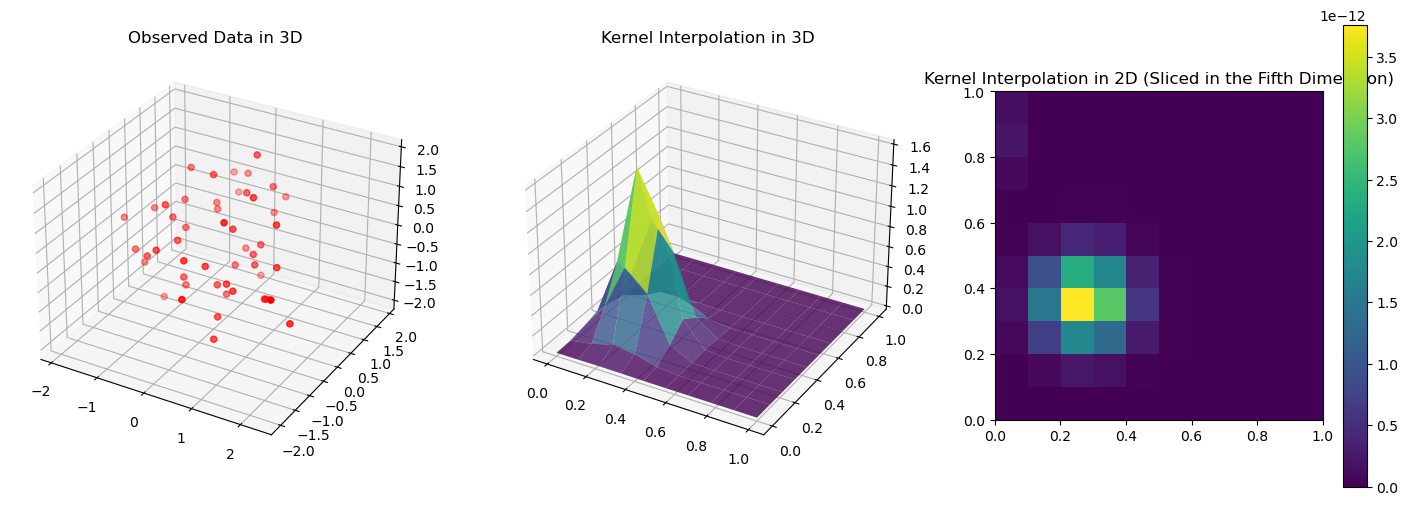

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate sample data in five dimensions
np.random.seed(42)
n_samples = 50
mean = np.zeros(5)
covariance_matrix = np.eye(5) 
sample_data = multivariate_normal(mean, covariance_matrix).rvs(n_samples)

x_observed = sample_data[:, 0]
y_observed = sample_data[:, 1]
z_observed = sample_data[:, 2]
w_observed = sample_data[:, 3]
v_observed = sample_data[:, 4]

# Define kernel function for five dimensions (Gaussian kernel)
def kernel_function(x, y, z, w, v, sigma=0.1):
    return np.exp(-((x**2 + y**2 + z**2 + w**2 + v**2) / (2 * sigma**2))) / ((2 * np.pi)**2.5 * sigma**5)

# Interpolation grid with reduced points
x_interpolation = np.linspace(0, 1, 10)
y_interpolation = np.linspace(0, 1, 10)
z_interpolation = np.linspace(0, 1, 10)
w_interpolation = np.linspace(0, 1, 10)
v_interpolation = np.linspace(0, 1, 10)

X_interpolation, Y_interpolation, Z_interpolation, W_interpolation, V_interpolation = np.meshgrid(
    x_interpolation, y_interpolation, z_interpolation, w_interpolation, v_interpolation
)

# Perform kernel interpolation in five dimensions
interpolated_values = np.zeros_like(X_interpolation)
for x_obs, y_obs, z_obs, w_obs, v_obs in zip(x_observed, y_observed, z_observed, w_observed, v_observed):
    interpolated_values += kernel_function(
        X_interpolation - x_obs,
        Y_interpolation - y_obs,
        Z_interpolation - z_obs,
        W_interpolation - w_obs,
        V_interpolation - v_obs
    )

# Normalize the interpolated values
interpolated_values /= n_samples

# Plot the results
fig = plt.figure(figsize=(18, 6))

# Scatter plot of observed points in 3D
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data in 3D')

# Kernel Interpolation in 3D
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X_interpolation[:, :, 0, 0, 0], Y_interpolation[:, :, 0, 0, 0], interpolated_values[:, :, 0, 0, 0], cmap='viridis', alpha=0.8)
ax2.set_title('Kernel Interpolation in 3D')

# Kernel Interpolation in 2D (slicing in the fifth dimension)
ax3 = fig.add_subplot(133)
plt.imshow(interpolated_values[:, :, 0, 0, 5], cmap='viridis', extent=[0, 1, 0, 1], origin='lower')
plt.title('Kernel Interpolation in 2D (Sliced in the Fifth Dimension)')
plt.colorbar()

plt.show()


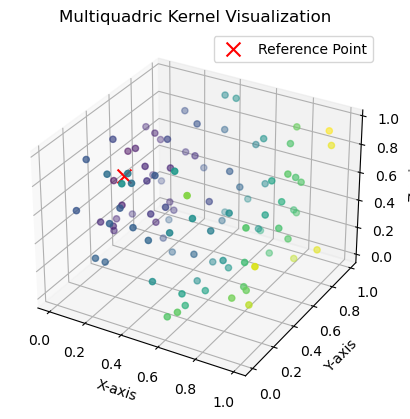

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def multiquadric_kernel(x, y, c=1.0):
    distance = np.linalg.norm(x - y)
    return np.sqrt(1 + (distance / c)**2)

# Generate random data in 3D space
np.random.seed(42)
num_points = 100
dimensionality = 3

data = np.random.rand(num_points, dimensionality)

# Choose a reference point
reference_point = np.random.rand(dimensionality)

# Compute Multiquadric Kernel values between the reference point and all other points
c = 1.0
kernel_values = [multiquadric_kernel(reference_point, data_point, c) for data_point in data]

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=kernel_values, cmap='viridis', marker='o')
ax.scatter(reference_point[0], reference_point[1], reference_point[2], c='red', marker='x', s=100, label='Reference Point')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Multiquadric Kernel Visualization')

plt.legend()
plt.show()


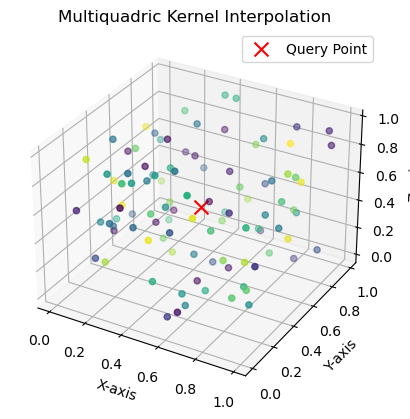

Interpolated Value at the Query Point: 0.41533423547800963


In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def multiquadric_kernel(x, y, c=1.0):
    distance = np.linalg.norm(x - y)
    return np.sqrt(1 + (distance / c)**2)

def multiquadric_kernel_interpolation(query_point, data, values, k=3, c=1.0):
    # Find k-nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors([query_point])
    
    # Calculate weights using Multiquadric Kernel
    weights = [multiquadric_kernel(query_point, data[i], c) for i in indices[0]]
    
    # Normalize weights
    weights /= np.sum(weights)
    
    # Interpolate the value at the query point
    interpolated_value = np.sum(weights * values[indices[0]])
    
    return interpolated_value

# Generate random 3D data and values
np.random.seed(42)
num_points = 100
dimensionality = 3

data = np.random.rand(num_points, dimensionality)
values = np.random.rand(num_points)

# Choose a query point
query_point = np.array([0.5, 0.5, 0.5])

# Perform Multiquadric Kernel Interpolation
interpolated_value = multiquadric_kernel_interpolation(query_point, data, values)

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=values, cmap='viridis', marker='o')
ax.scatter(query_point[0], query_point[1], query_point[2], c='red', marker='x', s=100, label='Query Point')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Multiquadric Kernel Interpolation')

plt.legend()
plt.show()

print(f"Interpolated Value at the Query Point: {interpolated_value}")


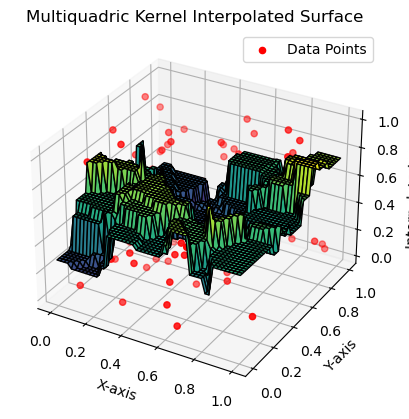

In [3]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def multiquadric_kernel(x, y, c=1.0):
    distance = np.linalg.norm(x - y)
    return np.sqrt(1 + (distance / c)**2)

def multiquadric_kernel_interpolation(query_point, data, values, k=3, c=1.0):
    # Find k-nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors([query_point])
    
    # Calculate weights using Multiquadric Kernel
    weights = [multiquadric_kernel(query_point, data[i], c) for i in indices[0]]
    
    # Normalize weights
    weights /= np.sum(weights)
    
    # Interpolate the value at the query point
    interpolated_value = np.sum(weights * values[indices[0]])
    
    return interpolated_value

# Generate random 3D data and values
np.random.seed(42)
num_points = 100
dimensionality = 3

data = np.random.rand(num_points, dimensionality)
values = np.random.rand(num_points)

# Create a grid of points
grid_resolution = 50
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, grid_resolution), np.linspace(0, 1, grid_resolution))
query_points = np.column_stack((x_grid.ravel(), y_grid.ravel(), 0.5 * np.ones(grid_resolution**2)))

# Perform Multiquadric Kernel Interpolation on the grid
interpolated_values = np.array([multiquadric_kernel_interpolation(point, data, values) for point in query_points])

# Reshape the interpolated values to match the grid shape
interpolated_values = interpolated_values.reshape((grid_resolution, grid_resolution))

# Visualize the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_grid, y_grid, interpolated_values, cmap='viridis', edgecolor='k')

ax.scatter(data[:, 0], data[:, 1], values, c='red', marker='o', label='Data Points')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Interpolated Values')
ax.set_title('Multiquadric Kernel Interpolated Surface')

plt.legend()
plt.show()


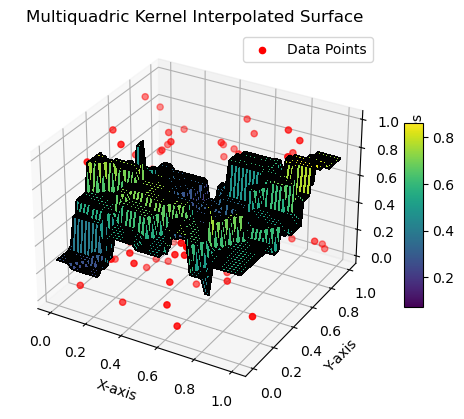

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def multiquadric_kernel(x, y, c=1.0):
    distance = np.linalg.norm(x - y)
    return np.sqrt(1 + (distance / c)**2)

def multiquadric_kernel_interpolation(query_point, data, values, k=3, c=1.0):
    # Find k-nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors([query_point])
    
    # Calculate weights using Multiquadric Kernel
    weights = [multiquadric_kernel(query_point, data[i], c) for i in indices[0]]
    
    # Normalize weights
    weights /= np.sum(weights)
    
    # Interpolate the value at the query point
    interpolated_value = np.sum(weights * values[indices[0]])
    
    return interpolated_value

# Generate random 3D data and values
np.random.seed(42)
num_points = 100
dimensionality = 3

data = np.random.rand(num_points, dimensionality)
values = np.random.rand(num_points)

# Create a grid of points
grid_resolution = 50
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, grid_resolution), np.linspace(0, 1, grid_resolution))
query_points = np.column_stack((x_grid.ravel(), y_grid.ravel(), 0.5 * np.ones(grid_resolution**2)))

# Perform Multiquadric Kernel Interpolation on the grid
interpolated_values = np.array([multiquadric_kernel_interpolation(point, data, values) for point in query_points])
interpolated_values = interpolated_values.reshape((grid_resolution, grid_resolution))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x_grid, y_grid, interpolated_values, cmap=cm.viridis, edgecolor='k', linewidth=0.5, antialiased=False)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.scatter(data[:, 0], data[:, 1], values, c='red', marker='o', label='Data Points')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Interpolated Values')
ax.set_title('Multiquadric Kernel Interpolated Surface')
plt.legend()
plt.show()

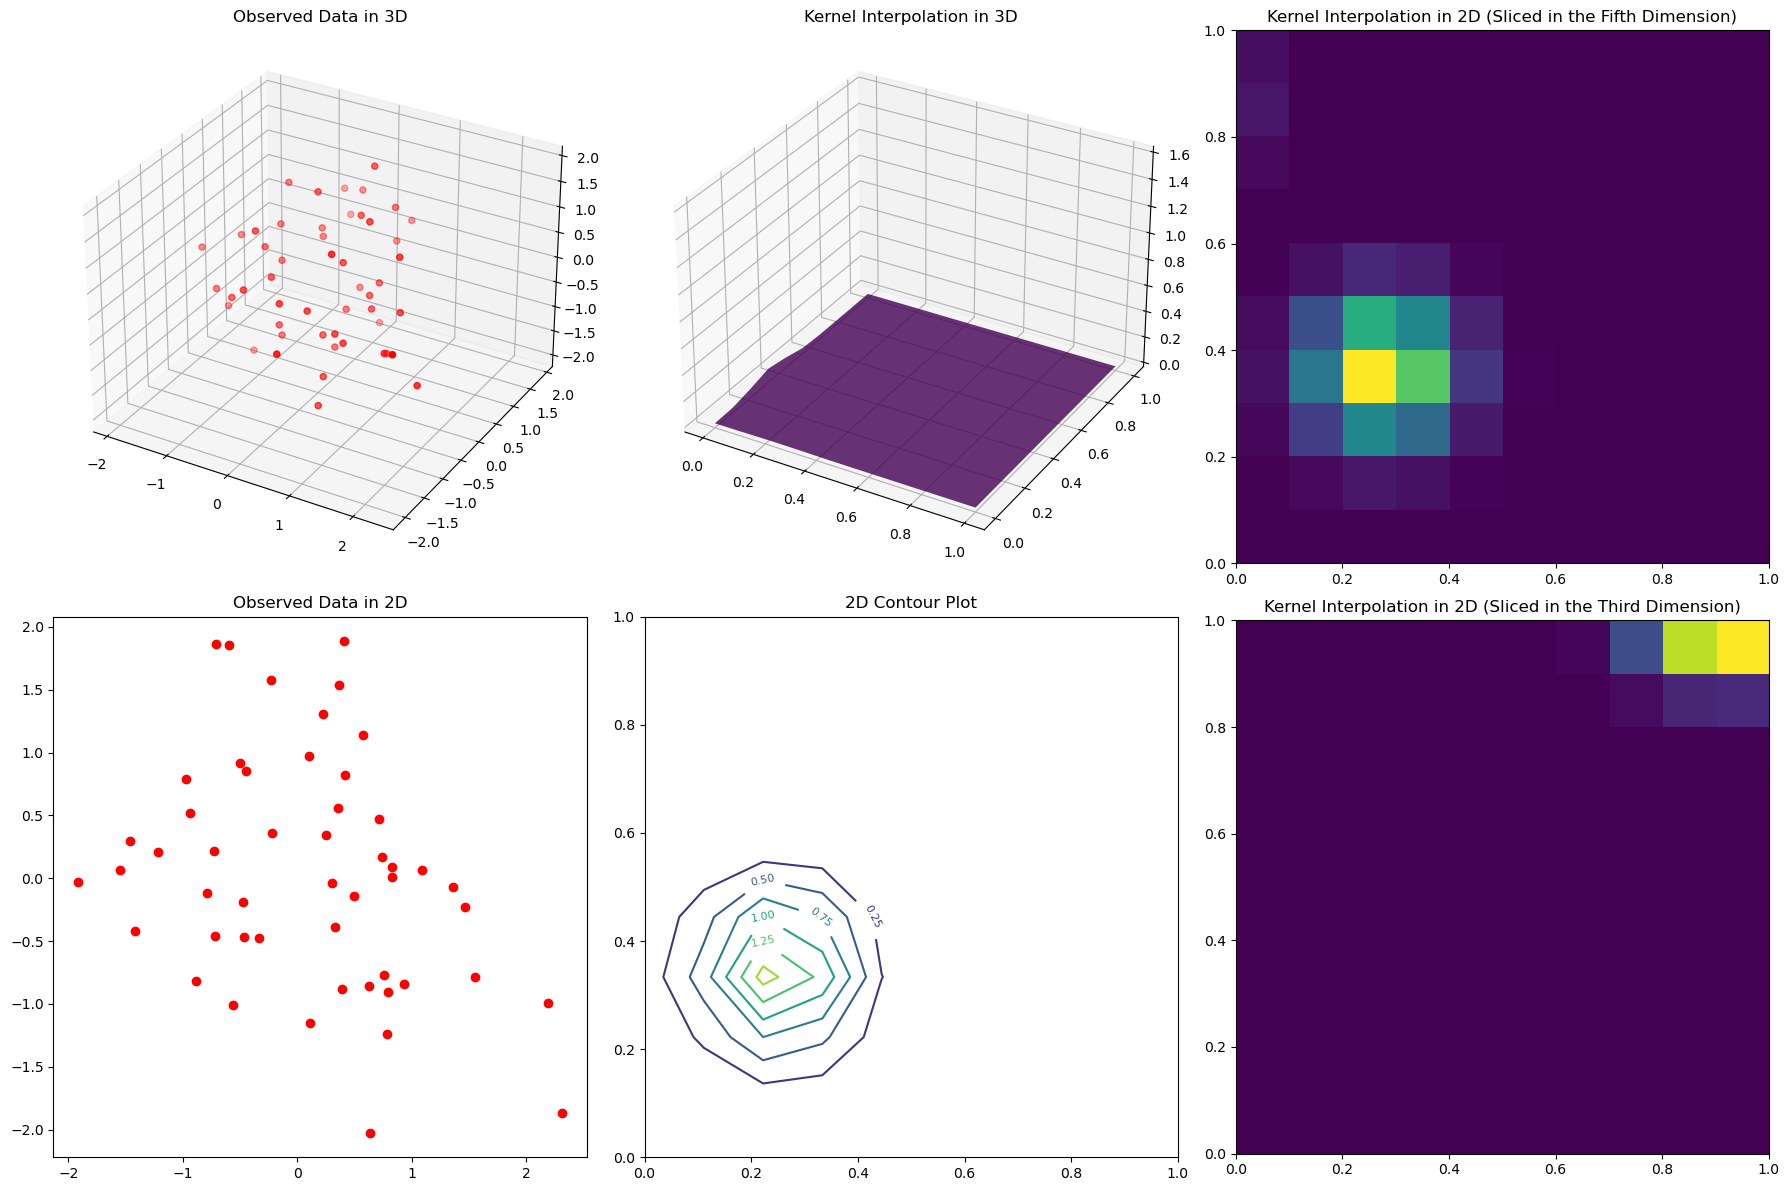

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Generate sample data in five dimensions
np.random.seed(42)
n_samples = 50
mean = np.zeros(5)
covariance_matrix = np.eye(5)  # Identity matrix for simplicity
sample_data = multivariate_normal(mean, covariance_matrix).rvs(n_samples)

x_observed = sample_data[:, 0]
y_observed = sample_data[:, 1]
z_observed = sample_data[:, 2]
w_observed = sample_data[:, 3]
v_observed = sample_data[:, 4]

# Define kernel function for five dimensions (Gaussian kernel)
def kernel_function(x, y, z, w, v, sigma=0.1):
    return np.exp(-((x**2 + y**2 + z**2 + w**2 + v**2) / (2 * sigma**2))) / ((2 * np.pi)**2.5 * sigma**5)

# Interpolation grid with reduced points
x_interpolation = np.linspace(0, 1, 10)
y_interpolation = np.linspace(0, 1, 10)
z_interpolation = np.linspace(0, 1, 10)
w_interpolation = np.linspace(0, 1, 10)
v_interpolation = np.linspace(0, 1, 10)

X_interpolation, Y_interpolation, Z_interpolation, W_interpolation, V_interpolation = np.meshgrid(
    x_interpolation, y_interpolation, z_interpolation, w_interpolation, v_interpolation
)

# Perform kernel interpolation in five dimensions
interpolated_values = np.zeros_like(X_interpolation)
for x_obs, y_obs, z_obs, w_obs, v_obs in zip(x_observed, y_observed, z_observed, w_observed, v_observed):
    interpolated_values += kernel_function(
        X_interpolation - x_obs,
        Y_interpolation - y_obs,
        Z_interpolation - z_obs,
        W_interpolation - w_obs,
        V_interpolation - v_obs
    )

# Normalize the interpolated values
interpolated_values /= n_samples

# Plot different combinations of scatter plots, 3D surface plots, and 2D contour plots
fig = plt.figure(figsize=(18, 12))

# Scatter plot of observed points in 3D
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data in 3D')

# Kernel Interpolation in 3D
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(X_interpolation[:, :, 0, 0, 0], Y_interpolation[:, :, 0, 0, 0], interpolated_values[:, :, 0, 0, 0], cmap='viridis', alpha=0.8, rstride=100, cstride=100)
ax2.set_title('Kernel Interpolation in 3D')

# Kernel Interpolation in 2D (slicing in the fifth dimension)
ax3 = fig.add_subplot(233)
ax3.imshow(interpolated_values[:, :, 0, 0, 5], cmap='viridis', extent=[0, 1, 0, 1], origin='lower')
ax3.set_title('Kernel Interpolation in 2D (Sliced in the Fifth Dimension)')

# Scatter plot of observed points in 2D
ax4 = fig.add_subplot(234)
ax4.scatter(x_observed, y_observed, c='r', marker='o', label='Observed Data')
ax4.set_title('Observed Data in 2D')

# 2D Contour plot
ax5 = fig.add_subplot(235)
contour_plot = ax5.contour(X_interpolation[:, :, 0, 0, 0], Y_interpolation[:, :, 0, 0, 0], interpolated_values[:, :, 0, 0, 0], cmap='viridis')
ax5.clabel(contour_plot, inline=True, fontsize=8)
ax5.set_title('2D Contour Plot')

# Kernel Interpolation in 2D (slicing in the third dimension)
ax6 = fig.add_subplot(236)
ax6.imshow(interpolated_values[:, 5, :, 0, 0], cmap='viridis', extent=[0, 1, 0, 1], origin='lower')
ax6.set_title('Kernel Interpolation in 2D (Sliced in the Third Dimension)')

plt.tight_layout()
plt.show()


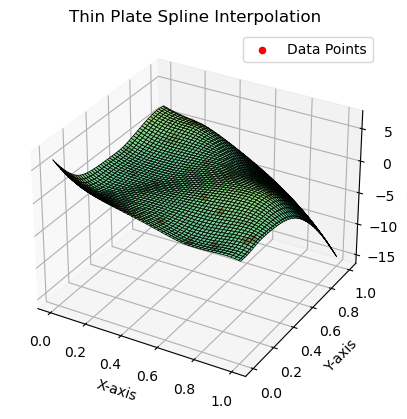

In [5]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random 3D data
np.random.seed(42)
num_points = 20
x_data = np.random.rand(num_points)
y_data = np.random.rand(num_points)
z_data = np.sin(2 * np.pi * x_data) * np.cos(2 * np.pi * y_data)

# Create a regular grid for interpolation
grid_resolution = 100
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, grid_resolution), np.linspace(0, 1, grid_resolution))
query_points = np.column_stack((x_grid.ravel(), y_grid.ravel()))

# Perform Thin Plate Spline Interpolation
rbf = Rbf(x_data, y_data, z_data, function='thin-plate')
z_grid = rbf(query_points[:, 0], query_points[:, 1])
z_grid = z_grid.reshape((grid_resolution, grid_resolution))

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter(x_data, y_data, z_data, c='red', marker='o', label='Data Points')

# Plot the interpolated surface
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='k', linewidth=0.5, alpha=0.7)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Thin Plate Spline Interpolation')

plt.legend()
plt.show()


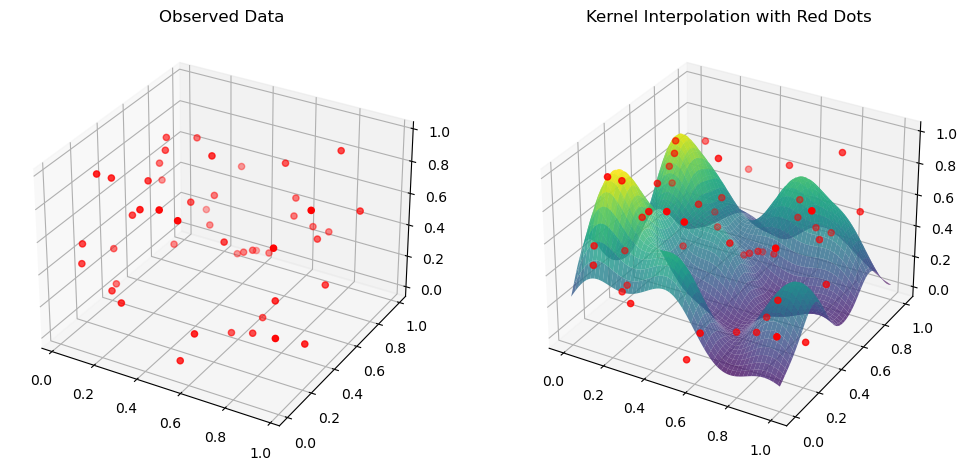

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate sample data
np.random.seed(42)
x_observed = np.random.rand(50)
y_observed = np.random.rand(50)
z_observed = np.random.rand(50)

# Define kernel function (Gaussian kernel)
def kernel_function(x, y, sigma=0.1):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

# Interpolation grid
x_interpolation = np.linspace(0, 1, 100)
y_interpolation = np.linspace(0, 1, 100)
X_interpolation, Y_interpolation = np.meshgrid(x_interpolation, y_interpolation)

# Perform kernel interpolation
Z_interpolation = np.zeros_like(X_interpolation)
for x_obs, y_obs, z_obs in zip(x_observed, y_observed, z_observed):
    Z_interpolation += z_obs * kernel_function(X_interpolation - x_obs, Y_interpolation - y_obs)

# Normalize the interpolated values
Z_interpolation /= len(x_observed)

# Plot the results
fig = plt.figure(figsize=(12, 6))

# Scatter plot of observed points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data')

# Kernel Interpolation with red dots
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_interpolation, Y_interpolation, Z_interpolation, cmap='viridis', alpha=0.8)
ax2.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax2.set_title('Kernel Interpolation with Red Dots')

plt.show()


In [21]:
# Choose an index for the observed point
point_index = 0

# Coordinates of the chosen observed point
x_point = x_observed[point_index]
y_point = y_observed[point_index]
z_point_observed = z_observed[point_index]

# Find the corresponding index in the interpolation grid
grid_x_index = np.argmin(np.abs(x_interpolation - x_point))
grid_y_index = np.argmin(np.abs(y_interpolation - y_point))

# Get the interpolated value at the chosen point
z_point_interpolated = Z_interpolation[grid_y_index, grid_x_index]

# Calculate the difference
difference = z_point_interpolated - z_point_observed

print(f"Observed Value: {z_point_observed}")
print(f"Interpolated Value: {z_point_interpolated}")
print(f"Difference: {difference}")


Observed Value: 0.03142918568673425
Interpolated Value: 0.19487306173967187
Difference: 0.16344387605293761


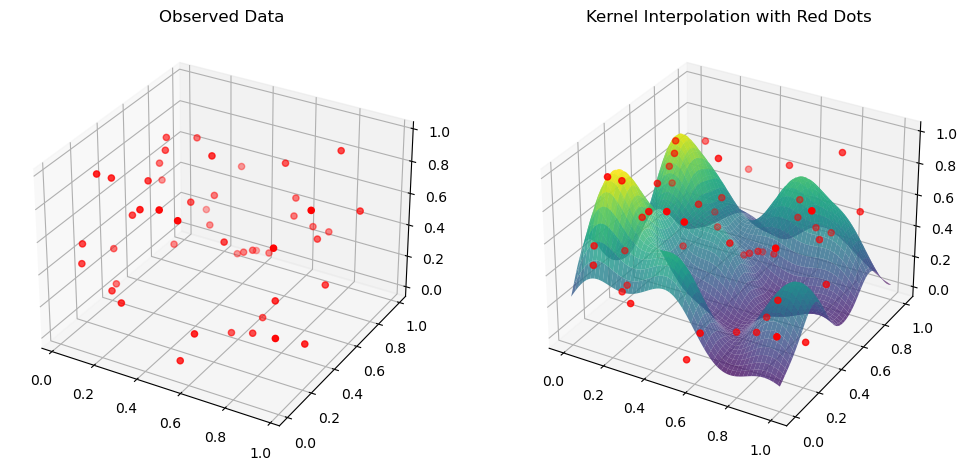

Asymptotic Error:
[0.21619667 0.36762343 0.02490897 0.19929316 0.57960391 0.09591869
 0.04961486 0.38112451 0.15723693 0.31852421 0.11305848 0.24677353
 0.51853324 0.39563827 0.2212429  0.46100769 0.39603407 0.21744104
 0.49268908 0.14383876 0.41625817 0.50894254 0.06561085 0.27070106
 0.1507664  0.04954753 0.44061987 0.48249034 0.37315164 0.12777815
 0.03061175 0.16943033 0.2772467  0.06581419 0.53253014 0.09462917
 0.09315574 0.26940542 0.07794187 0.52249074 0.50590919 0.2112815
 0.02863465 0.17205662 0.19094305 0.44004834 0.13337035 0.02927887
 0.41695953 0.18259606]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x_observed = np.random.rand(50)
y_observed = np.random.rand(50)
z_observed = np.random.rand(50)
def kernel_function(x, y, sigma=0.1):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
x_interpolation = np.linspace(0, 1, 100)
y_interpolation = np.linspace(0, 1, 100)
X_interpolation, Y_interpolation = np.meshgrid(x_interpolation, y_interpolation)
Z_interpolation = np.zeros_like(X_interpolation)
for x_obs, y_obs, z_obs in zip(x_observed, y_observed, z_observed):
    Z_interpolation += z_obs * kernel_function(X_interpolation - x_obs, Y_interpolation - y_obs)
Z_interpolation /= len(x_observed)
Z_interpolation_reshaped = Z_interpolation.ravel()
z_observed_flattened = z_observed.ravel()
asymptotic_error = np.abs(z_observed_flattened - Z_interpolation_reshaped[:len(z_observed_flattened)])
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_interpolation, Y_interpolation, Z_interpolation, cmap='viridis', alpha=0.8)
ax2.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax2.set_title('Kernel Interpolation with Red Dots')
plt.show()
print("Asymptotic Error:")
print(asymptotic_error)


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

def gaussian_kernel(distances, bandwidth=1.0):
    return np.exp(-0.5 * (distances / bandwidth)**2)

def kernel_interpolation(target_point, observed_points, observed_values, kernel_bandwidth=1.0):
    distances = euclidean_distances([target_point], observed_points)
    weights = gaussian_kernel(distances, bandwidth=kernel_bandwidth)
    weighted_sum = np.sum(weights * observed_values)
    normalization_factor = np.sum(weights)
    
    if normalization_factor == 0:
        return 0  # Avoid division by zero
    
    return weighted_sum / normalization_factor

# Generate some random data
np.random.seed(42)
data = np.random.rand(10, 5)
observed_points = data[:, :5]
observed_values = data[:, -1]

# Convert to DataFrame for demonstration
columns = ['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5', 'Value']
df = pd.DataFrame(np.column_stack([observed_points, observed_values]), columns=columns)

# Define a target point for interpolation
target_point = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

# Perform kernel interpolation
interpolated_value = kernel_interpolation(target_point, observed_points, observed_values)

print(f"Interpolated value at {target_point}: {interpolated_value}")


Interpolated value at [0.5 0.5 0.5 0.5 0.5]: 0.3598346428551147


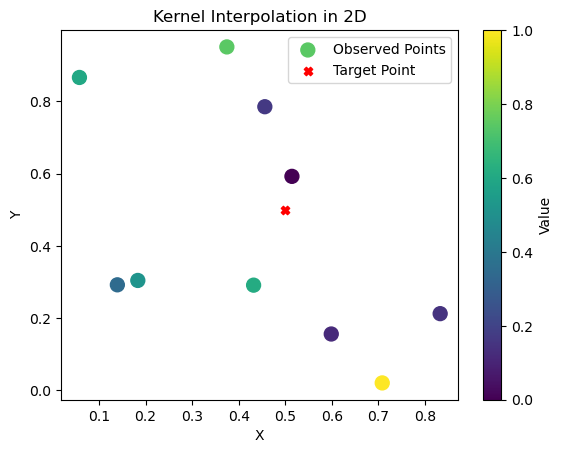

Interpolated value at [0.5 0.5]: 0.4310003194143176


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def gaussian_kernel(distances, bandwidth=1.0):
    return np.exp(-0.5 * (distances / bandwidth)**2)

def kernel_interpolation(target_point, observed_points, observed_values, kernel_bandwidth=1.0):
    distances = euclidean_distances([target_point], observed_points)
    weights = gaussian_kernel(distances, bandwidth=kernel_bandwidth)
    weighted_sum = np.sum(weights * observed_values)
    normalization_factor = np.sum(weights)
    
    if normalization_factor == 0:
        return 0  # Avoid division by zero
    
    return weighted_sum / normalization_factor

# Generate some random data
np.random.seed(42)
data = np.random.rand(10, 3)  # Using 3D for visualization
observed_points = data[:, :2]
observed_values = data[:, -1]

# Convert to DataFrame for demonstration
columns = ['X', 'Y', 'Value']
df = pd.DataFrame(np.column_stack([observed_points, observed_values]), columns=columns)

# Define a target point for interpolation
target_point = np.array([0.5, 0.5])

# Perform kernel interpolation
interpolated_value = kernel_interpolation(target_point, observed_points, observed_values)

# Plotting
plt.scatter(df['X'], df['Y'], c=df['Value'], cmap='viridis', label='Observed Points', s=100)
plt.scatter(target_point[0], target_point[1], color='red', marker='X', label='Target Point')
plt.title('Kernel Interpolation in 2D')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Value')
plt.legend()
plt.show()

print(f"Interpolated value at {target_point}: {interpolated_value}")


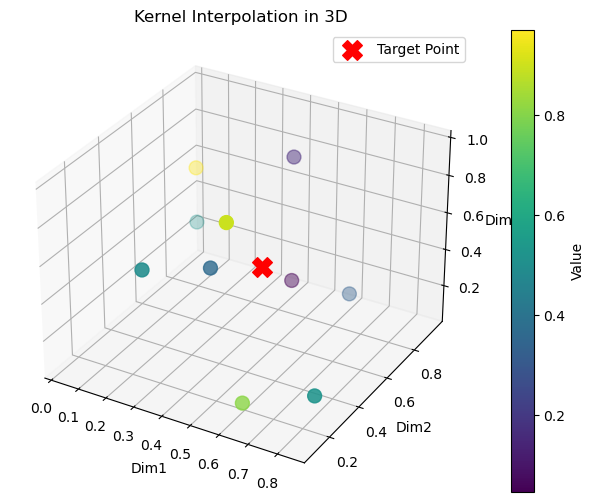

Interpolated value at [0.5 0.5 0.5 0.5 0.5]: 0.49310182916121814


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def gaussian_kernel(distances, bandwidth=1.0):
    return np.exp(-0.5 * (distances / bandwidth)**2)

def kernel_interpolation(target_point, observed_points, observed_values, kernel_bandwidth=1.0):
    distances = euclidean_distances([target_point], observed_points)
    weights = gaussian_kernel(distances, bandwidth=kernel_bandwidth)
    weighted_sum = np.sum(weights * observed_values)
    normalization_factor = np.sum(weights)
    
    if normalization_factor == 0:
        return 0  # Avoid division by zero
    
    return weighted_sum / normalization_factor

# Generate some random data
np.random.seed(42)
data = np.random.rand(10, 6)  # Using 6D for demonstration
observed_points = data[:, :5]
observed_values = data[:, -1]

# Convert to DataFrame for demonstration
columns = ['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5', 'Value']
df = pd.DataFrame(np.column_stack([observed_points, observed_values]), columns=columns)

# Define a target point for interpolation
target_point = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

# Perform kernel interpolation
interpolated_value = kernel_interpolation(target_point, observed_points, observed_values)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Dim1'], df['Dim2'], df['Dim3'], c=df['Value'], cmap='viridis', s=100)
ax.scatter(target_point[0], target_point[1], target_point[2], color='red', marker='X', s=200, label='Target Point')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')
fig.colorbar(scatter, label='Value')
ax.legend()
plt.title('Kernel Interpolation in 3D')
plt.show()

print(f"Interpolated value at {target_point}: {interpolated_value}")


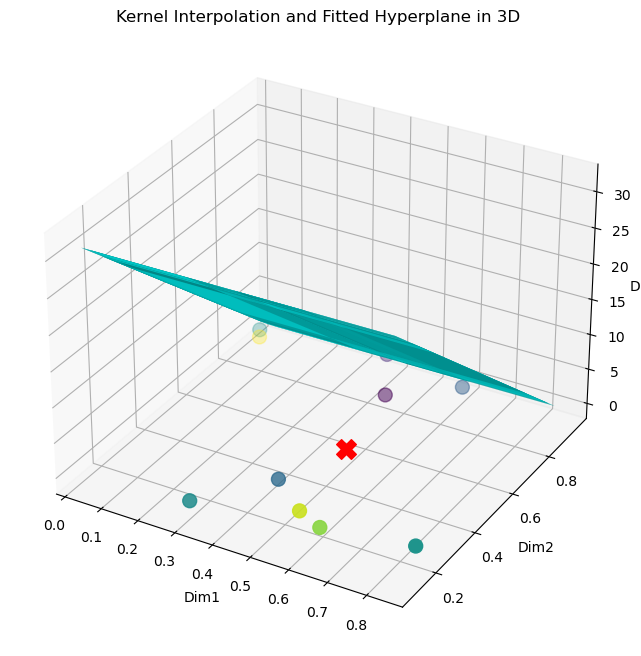

Interpolated value at [0.5 0.5 0.5 0.5 0.5]: 0.49310182916121814


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

def gaussian_kernel(distances, bandwidth=1.0):
    return np.exp(-0.5 * (distances / bandwidth)**2)

def kernel_interpolation(target_point, observed_points, observed_values, kernel_bandwidth=1.0):
    distances = euclidean_distances([target_point], observed_points)
    weights = gaussian_kernel(distances, bandwidth=kernel_bandwidth)
    weighted_sum = np.sum(weights * observed_values)
    normalization_factor = np.sum(weights)
    
    if normalization_factor == 0:
        return 0  # Avoid division by zero
    
    return weighted_sum / normalization_factor

# Generate some random data
np.random.seed(42)
data = np.random.rand(10, 6)  # Using 6D for demonstration
observed_points = data[:, :5]
observed_values = data[:, -1]

# Convert to DataFrame for demonstration
columns = ['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5', 'Value']
df = pd.DataFrame(np.column_stack([observed_points, observed_values]), columns=columns)

# Define a target point for interpolation
target_point = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

# Perform kernel interpolation
interpolated_value = kernel_interpolation(target_point, observed_points, observed_values)

# Fit a hyperplane using linear regression
regressor = LinearRegression()
regressor.fit(observed_points, observed_values)
plane_intercept = regressor.intercept_
plane_coefficients = regressor.coef_

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot observed points
scatter = ax.scatter(df['Dim1'], df['Dim2'], df['Dim3'], c=df['Value'], cmap='viridis', s=100)

# Plot target point
ax.scatter(target_point[0], target_point[1], target_point[2], color='red', marker='X', s=200)

# Plot fitted hyperplane
xx, yy = np.meshgrid(df['Dim1'], df['Dim2'])
zz = (-plane_coefficients[0] * xx - plane_coefficients[1] * yy - plane_intercept) / plane_coefficients[2]
ax.plot_surface(xx, yy, zz, alpha=0.5, color='cyan')

ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')

plt.title('Kernel Interpolation and Fitted Hyperplane in 3D')
plt.show()

print(f"Interpolated value at {target_point}: {interpolated_value}")


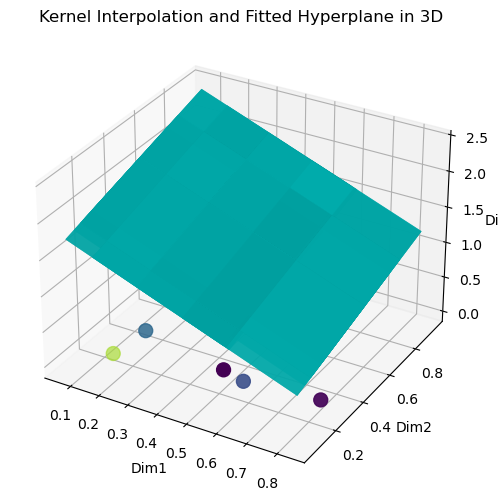

Interpolated value at [0.5 0.5 0.5]: 0.5094750815007948


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression

def gaussian_kernel(distances, bandwidth=1.0):
    return np.exp(-0.5 * (distances / bandwidth)**2)

def kernel_interpolation(target_point, observed_points, observed_values, kernel_bandwidth=1.0):
    distances = euclidean_distances([target_point], observed_points)
    weights = gaussian_kernel(distances, bandwidth=kernel_bandwidth)
    weighted_sum = np.sum(weights * observed_values)
    normalization_factor = np.sum(weights)
    
    if normalization_factor == 0:
        return 0  # Avoid division by zero
    
    return weighted_sum / normalization_factor

# Generate some random data
np.random.seed(42)
data = np.random.rand(10, 4)  # Using 4D for demonstration
observed_points = data[:, :3]
observed_values = data[:, -1]

# Convert to DataFrame for demonstration
columns = ['Dim1', 'Dim2', 'Dim3', 'Value']
df = pd.DataFrame(np.column_stack([observed_points, observed_values]), columns=columns)

# Define a target point for interpolation
target_point = np.array([0.5, 0.5, 0.5])

# Perform kernel interpolation
interpolated_value = kernel_interpolation(target_point, observed_points, observed_values)

# Fit a hyperplane using linear regression
regressor = LinearRegression()
regressor.fit(observed_points, observed_values)
plane_intercept = regressor.intercept_
plane_coefficients = regressor.coef_

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot observed points
scatter = ax.scatter(df['Dim1'], df['Dim2'], df['Dim3'], c=df['Value'], cmap='viridis', s=100)

# Plot target point
ax.scatter(target_point[0], target_point[1], target_point[2], color='red', marker='X', s=200)

# Plot fitted hyperplane
xx, yy = np.meshgrid(df['Dim1'], df['Dim2'])
zz = (-plane_coefficients[0] * xx - plane_coefficients[1] * yy - plane_intercept) / plane_coefficients[2]
ax.plot_surface(xx, yy, zz, alpha=0.5, color='cyan')

ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')

plt.title('Kernel Interpolation and Fitted Hyperplane in 3D')
plt.show()

print(f"Interpolated value at {target_point}: {interpolated_value}")


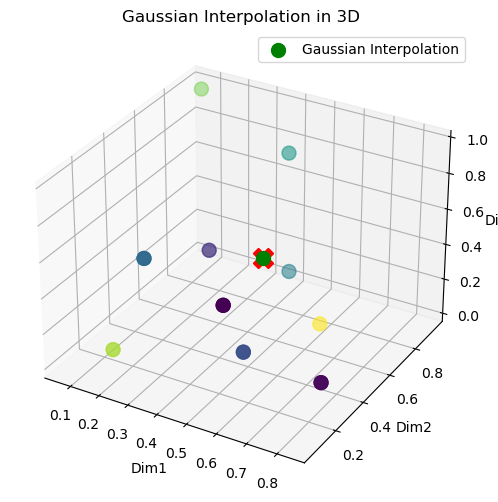

Gaussian Interpolated value at [0.5 0.5 0.5]: 0.26388615650749847


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Generate some random data
np.random.seed(42)
data = np.random.rand(10, 4)  # Using 4D for demonstration
observed_points = data[:, :3]
observed_values = data[:, -1]

# Convert to DataFrame for demonstration
columns = ['Dim1', 'Dim2', 'Dim3', 'Value']
df = pd.DataFrame(np.column_stack([observed_points, observed_values]), columns=columns)

# Define a target point for interpolation
target_point = np.array([0.5, 0.5, 0.5])

# Perform Gaussian interpolation using RBF
rbf = Rbf(df['Dim1'], df['Dim2'], df['Dim3'], observed_values, function='gaussian')
interpolated_value = rbf(target_point[0], target_point[1], target_point[2])

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot observed points
scatter = ax.scatter(df['Dim1'], df['Dim2'], df['Dim3'], c=df['Value'], cmap='viridis', s=100)

# Plot target point
ax.scatter(target_point[0], target_point[1], target_point[2], color='red', marker='X', s=200)

# Plot Gaussian interpolation
xx, yy, zz = np.meshgrid(df['Dim1'], df['Dim2'], df['Dim3'])
interp_values = rbf(xx.ravel(), yy.ravel(), zz.ravel())
interp_values = interp_values.reshape(xx.shape)
ax.scatter(df['Dim1'], df['Dim2'], df['Dim3'], c=df['Value'], cmap='viridis', s=100)
ax.scatter(target_point[0], target_point[1], target_point[2], color='red', marker='X', s=200)
ax.scatter(target_point[0], target_point[1], target_point[2], color='green', marker='o', s=100, label='Gaussian Interpolation')

ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')

plt.title('Gaussian Interpolation in 3D')
plt.legend()
plt.show()

print(f"Gaussian Interpolated value at {target_point}: {interpolated_value}")


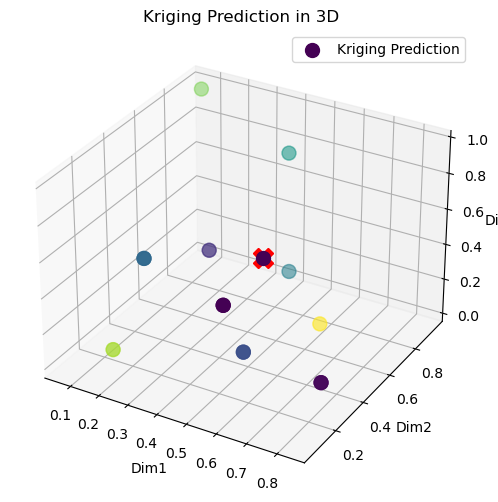

Kriging Predicted value at [0.5 0.5 0.5]: 0.24789544165172717


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate some random data
np.random.seed(42)
data = np.random.rand(10, 4)  # Using 4D for demonstration
observed_points = data[:, :3]
observed_values = data[:, -1]

# Convert to DataFrame for demonstration
columns = ['Dim1', 'Dim2', 'Dim3', 'Value']
df = pd.DataFrame(np.column_stack([observed_points, observed_values]), columns=columns)

# Define a target point for prediction
target_point = np.array([0.5, 0.5, 0.5])

# Perform Kriging prediction
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(observed_points, observed_values.reshape(-1, 1))

# Predict at the target point
interpolated_value, _ = gp.predict([target_point], return_std=True)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot observed points
scatter = ax.scatter(df['Dim1'], df['Dim2'], df['Dim3'], c=df['Value'], cmap='viridis', s=100)

# Plot target point
ax.scatter(target_point[0], target_point[1], target_point[2], color='red', marker='X', s=200)

# Plot Kriging prediction
xx, yy, zz = np.meshgrid(df['Dim1'], df['Dim2'], df['Dim3'])
input_points = np.column_stack([xx.ravel(), yy.ravel(), zz.ravel()])
predictions, _ = gp.predict(input_points, return_std=True)
predictions = predictions.reshape(xx.shape)
ax.scatter(df['Dim1'], df['Dim2'], df['Dim3'], c=df['Value'], cmap='viridis', s=100)
ax.scatter(target_point[0], target_point[1], target_point[2], color='red', marker='X', s=200)
ax.scatter(target_point[0], target_point[1], target_point[2], c=interpolated_value, cmap='viridis', marker='o', s=100, label='Kriging Prediction')

ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')

plt.title('Kriging Prediction in 3D')
plt.legend()
plt.show()

print(f"Kriging Predicted value at {target_point}: {interpolated_value[0]}")


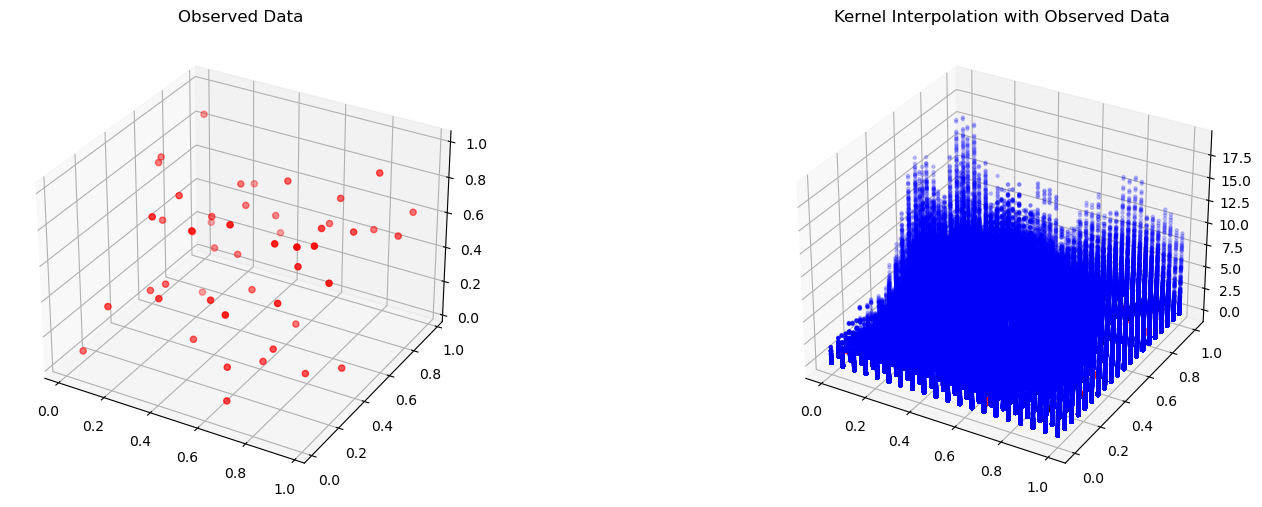

Asymptotic Error:
[0.29444889 0.38509773 0.85113667 0.31692201 0.16949275 0.55680126
 0.93615477 0.6960298  0.57006117 0.09717649 0.61500723 0.99005385
 0.14008401 0.51832964 0.87737303 0.7407685  0.69701552 0.70248376
 0.35949078 0.29359153 0.80936116 0.81011339 0.86707232 0.91324055
 0.5113424  0.50151629 0.79829518 0.64996393 0.70196688 0.79579267
 0.89000534 0.33799515 0.37558294 0.09398187 0.57827991 0.03594169
 0.46559688 0.54264295 0.28653936 0.59083165 0.03050025 0.03734819
 0.82260056 0.36019064 0.12706051 0.52224326 0.76999355 0.21582103
 0.62289048 0.08534746]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data for 5-dimensional space
np.random.seed(42)
num_points = 50
x_observed = np.random.rand(num_points, 5)
z_observed = np.random.rand(num_points)

# Define kernel function (Gaussian kernel) for 5-dimensional space
def kernel_function(x, sigma=0.1):
    return np.exp(-np.sum(x**2, axis=-1) / (2 * sigma**2)) / ((2 * np.pi)**(5/2) * sigma**5)

# Interpolation grid for 5-dimensional space
x_interpolation = np.linspace(0, 1, 20)
X_interpolation = np.meshgrid(*[x_interpolation] * 5)

# Perform kernel interpolation
Z_interpolation = np.zeros_like(X_interpolation[0])
for x_obs, z_obs in zip(x_observed, z_observed):
    Z_interpolation += z_obs * kernel_function(np.stack([X - x for X, x in zip(X_interpolation, x_obs)], axis=-1))

# Normalize the interpolated values
Z_interpolation /= num_points

# Reshape interpolated values to match the shape of z_observed
Z_interpolation_reshaped = Z_interpolation.ravel()

# Flatten observed values to match the shape of Z_interpolation
z_observed_flattened = z_observed.ravel()

# Calculate the asymptotic error
asymptotic_error = np.abs(z_observed_flattened - Z_interpolation_reshaped[:len(z_observed_flattened)])

# Plot the results
fig = plt.figure(figsize=(18, 6))

# Scatter plot of observed points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_observed[:, 0], x_observed[:, 1], z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data')

# Kernel Interpolation with red dots
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_interpolation[0], X_interpolation[1], Z_interpolation, c='b', marker='.', alpha=0.2, label='Interpolated Surface')
ax2.scatter(x_observed[:, 0], x_observed[:, 1], z_observed, c='r', marker='o', label='Observed Data')
ax2.set_title('Kernel Interpolation with Observed Data')

plt.show()

# Print asymptotic error
print("Asymptotic Error:")
print(asymptotic_error)

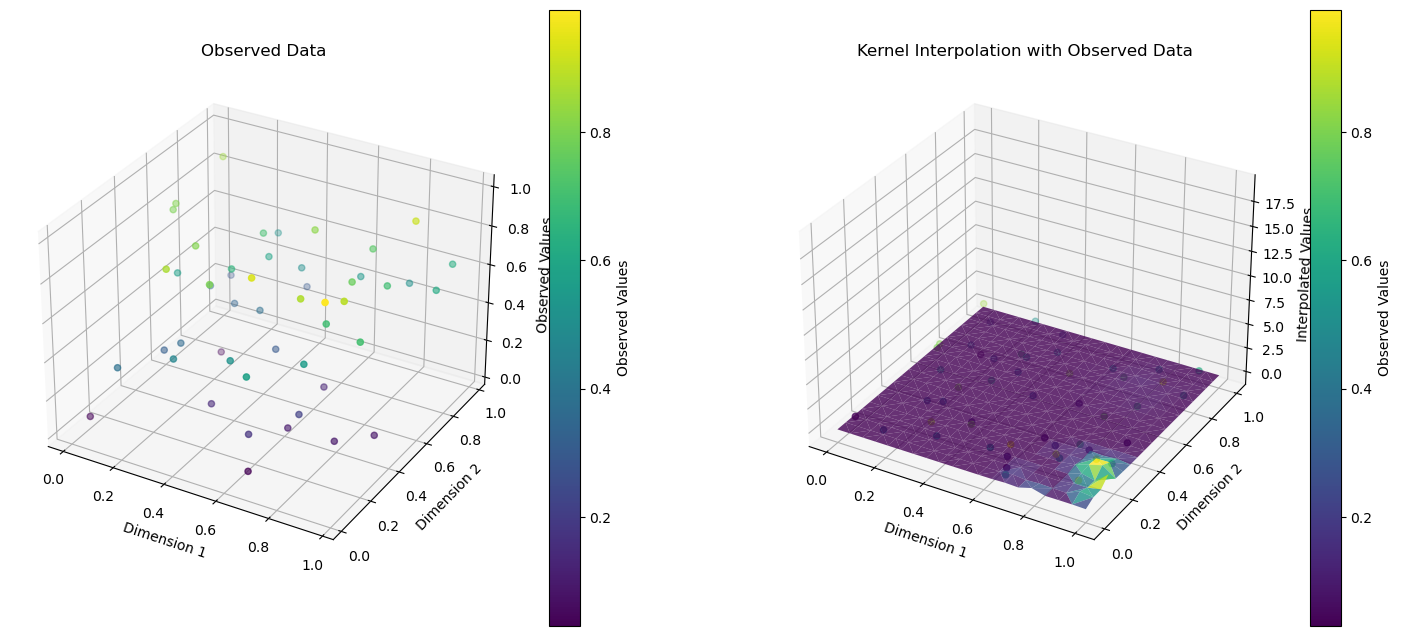

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate sample data for 5-dimensional space
np.random.seed(42)
num_points = 50
x_observed = np.random.rand(num_points, 5)
z_observed = np.random.rand(num_points)

# Define kernel function (Gaussian kernel) for 5-dimensional space
def kernel_function(x, sigma=0.1):
    return np.exp(-np.sum(x**2, axis=-1) / (2 * sigma**2)) / ((2 * np.pi)**(5/2) * sigma**5)

# Interpolation grid for 5-dimensional space
x_interpolation = np.linspace(0, 1, 20)
X_interpolation = np.meshgrid(*[x_interpolation] * 5)

# Perform kernel interpolation
Z_interpolation = np.zeros_like(X_interpolation[0])
for x_obs, z_obs in zip(x_observed, z_observed):
    Z_interpolation += z_obs * kernel_function(np.stack([X - x for X, x in zip(X_interpolation, x_obs)], axis=-1))

# Normalize the interpolated values
Z_interpolation /= num_points

# Plot the results
fig = plt.figure(figsize=(18, 8))

# Plot the observed data in a 2D projection
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(x_observed[:, 0], x_observed[:, 1], z_observed, c=z_observed, cmap='viridis', marker='o', label='Observed Data')
ax1.set_title('Observed Data')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.set_zlabel('Observed Values')
fig.colorbar(scatter, ax=ax1, label='Observed Values')

# Plot the kernel interpolation in a 2D projection
ax2 = fig.add_subplot(122, projection='3d')
# Reshape X_interpolation and Z_interpolation to 2D arrays
X_interpolation_2d = np.stack([X.flatten() for X in X_interpolation], axis=-1)
Z_interpolation_reshaped = Z_interpolation.flatten()
surface = ax2.plot_trisurf(X_interpolation_2d[:, 0], X_interpolation_2d[:, 1], Z_interpolation_reshaped, cmap=cm.viridis, alpha=0.8)
scatter2 = ax2.scatter(x_observed[:, 0], x_observed[:, 1], z_observed, c=z_observed, cmap='viridis', marker='o', label='Observed Data')
ax2.set_title('Kernel Interpolation with Observed Data')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.set_zlabel('Interpolated Values')
fig.colorbar(scatter2, ax=ax2, label='Observed Values')

plt.show()
